In [10]:
# Important Imports 
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
#Reading all files from given dataset 1 
path = r'/content/drive/MyDrive/Pattern Rec/training_validation' # use your path
all_files = glob.glob(path + "/class_[0-9]_*")

In [12]:
# Creating data frame to store the files content.
print(f"total no of files found: {len(all_files)}")

main_data = pd.DataFrame(columns=range(0, 1025))
print(f"main dataframe created with shape: {main_data.shape}")

total no of files found: 1934
main dataframe created with shape: (0, 1025)


In [13]:
# convert the value into list comma seperated value
def to_list(li):
  l = []
  for i in range(32):
    l.extend(list(li['data'][i]))

  return l

In [14]:
# To store all the file content values in dict format.
mydic = {}
def create_dict(myList, outputClass):
  for i in range(len(myList)+1):
    if i == 1024:
      mydic[i] = outputClass
    else:
      mydic[i] = myList[i]
    
  return mydic


In [15]:
# flatining the data set  
for filenames in all_files:
  # find the class name of the file
  class_name = str(filenames[(filenames.find('class_') + 6)])
  # pick one smaple file from class each time
  temp = pd.read_csv(filenames, names=["data"])
  # convert in list
  to_append = to_list(temp)
  # append in dict
  myDict = create_dict(to_append, class_name)
  # Create a dataframe
  main_data = main_data.append(myDict, ignore_index=True)

In [16]:
# Printing the shape of main_data frame. It consist of 1934 rows (no of files data) X (1024 faetures + 1(at 1025) target value)
main_data.shape

(1934, 1025)

In [17]:
# Preparing data for the model
X = main_data[[i for i in range(1024)]].to_numpy()
y= main_data[[1024]].to_numpy()
y = y.ravel()

Designing the **KNN**

In [20]:
# this function will help us calculating Euclidean Distance
def Euclidean_d(row1, row2):
   return np.sqrt(np.sum((row1 - row2)**2))

In [21]:
# Calculate accuracy percentage
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [30]:
from collections import Counter
class KNN:

  def __init__(self, k=3):
    self.k = k

  # There is no learning involve hence just storing the data
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  # Predicting the class
  def predict(self, X):
     predicted_labels = [self._predict(x) for x in X]
     return np.array(predicted_labels)

  def _predict(self, x):
    #compute distance 
    distances = [Euclidean_d(x, x_train) for x_train in self.X_train]
    #get the k nearest samples, labels
    k_indices = np.argsort(distances)[:self.k]
    closest_label = [self.y_train[i] for i in k_indices]
    #Return the major class.
    guessed = Counter(closest_label).most_common(1)
    return guessed[0][0]

**REFERENCE:-** https://github.com/python-engineer/MLfromscratch

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)  

In [33]:
# Plotting the graph to analyze the effect of k value on our data 
k_range = range(1,12)
scores_list1 = []
scores1 = {}
for k in k_range:
  clf = KNN(k=k)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  scores1[k] = accuracy(y_test, y_pred)
  scores_list1.append(accuracy(y_test, y_pred))

Text(0, 0.5, 'testing accuracy')

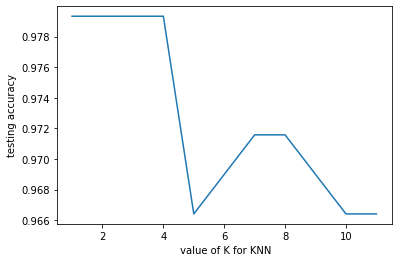

In [34]:
plt.plot(k_range, scores_list1)
plt.xlabel(" value of K for KNN")
plt.ylabel("testing accuracy")

In [36]:
# Applying the K-fold method to find out the best K
from sklearn.model_selection import KFold

In [37]:
k = 5 # No of folds 
kf = KFold(n_splits=k,shuffle=True,random_state=None) # Shuffle and craete k folds

In [38]:
# Creating the table to plot the accuracy from k (1 to 11)
acc_score = np.zeros((11, 5))

In [39]:
for K in range(1, 12):
  j = 0
  for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    X_train = X_train.astype(int)
    X_test = X_test.astype(int)
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
    model = KNN(K)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    acc = accuracy(pred_values , y_test)
    acc_score[K-1][j] = acc
    j += 1

In [40]:
# The accuracy Score table for k (1 to 11) and for 5 Kfold
acc_score

array([[0.96382429, 0.96382429, 0.95090439, 0.97674419, 0.98186528],
       [0.95607235, 0.97674419, 0.96640827, 0.97416021, 0.97409326],
       [0.97932817, 0.96899225, 0.97932817, 0.96640827, 0.98186528],
       [0.98191214, 0.97932817, 0.98191214, 0.96640827, 0.96632124],
       [0.95348837, 0.97932817, 0.97674419, 0.97674419, 0.96373057],
       [0.97932817, 0.96382429, 0.97674419, 0.97932817, 0.97409326],
       [0.94573643, 0.97932817, 0.97674419, 0.96124031, 0.99222798],
       [0.96640827, 0.96124031, 0.97674419, 0.97157623, 0.97150259],
       [0.96899225, 0.96640827, 0.97932817, 0.95865633, 0.96373057],
       [0.97674419, 0.96382429, 0.96124031, 0.95607235, 0.97409326],
       [0.96382429, 0.96124031, 0.96124031, 0.96899225, 0.96373057]])

In [55]:
# find the mean and returning the sutaible k value from KFold
acc_mean = acc_score.mean(1)
best_k = np.argmax(acc_mean) + 1
heights_accuracy = max(acc_mean) 

In [70]:
print(f' After 5 folds the best k value: {best_k}')
print(f' At k = {best_k} the accuracy is {heights_accuracy*100}')

 After 5 folds the best k value: 3
 At k = 3 the accuracy is 97.51844265038626


In [69]:
#Trainig the model at k = 3
model = KNN(best_k)
model.fit(X_train,y_train)
pred_values = model.predict(X_test)
acc = accuracy(pred_values , y_test)
print(f'accuracy of the model at k = {best_k} is: {acc * 100}')

accuracy of the model at k = 3 is: 97.9328165374677


In [58]:
# Loading the test file of Dataset 1 to Test our model
path = r'/content/drive/MyDrive/Pattern Rec/test' # use your path
new_test_file = glob.glob(path + "/class_[0-9]_*")
print(f"total no of files found: {len(new_test_file)}")

total no of files found: 946


In [59]:
test_data = pd.DataFrame(columns=range(0, 1025))
print(f"main dataframe created with shape: {test_data.shape}")

main dataframe created with shape: (0, 1025)


In [60]:
for filenames in new_test_file:
  # find the class name of the file
  class_name = str(filenames[(filenames.find('class_') + 6)])
  #print(f"Sample belongs to class: {class_name}")
  # pick one smaple file from class
  temp = pd.read_csv(filenames, names=["data"])
  to_append = to_list(temp)
  myDict = create_dict(to_append, class_name)
  test_data = test_data.append(myDict, ignore_index=True)

In [63]:
#Shape of test dataset
test_data.shape

(946, 1025)

In [64]:
# Seprating the test data into features and label
test_content = test_data[[i for i in range(0, 1024)]].to_numpy()
test_label = test_data[[1024]].to_numpy()
test_label = test_label.ravel()

In [65]:
test_content = test_content.astype(int)
test_label = test_label.astype(int)

In [66]:
# prediction on Test data of dataset 1 
Test_pred = clf.predict(test_content)

In [68]:
test_acc = accuracy(test_label, Test_pred)
print(f'accuracy of the model at k = {best_k} is: {test_acc * 100}')

accuracy of the model at k = 3 is: 98.09725158562368
